# Homework 1: Exploring & Visualizing Data

Make you have seaborn and missingno installed. Run `pip3 install seaborn` and `pip3 install missingno` in your container/shell if you don't.

## Setup

In this homework, we will more rigorously explore data visualization and data manipulation with a couple datasets. Please fill in the cells with `## YOUR CODE HERE` following the appropriate directions.

In [3]:
# removes the need to call plt.show() every time
%matplotlib inline

Seaborn is a powerful data visualization library built on top of matplotlib. We will be using seaborn for this homework (since it is a better tool and you should know it well). Plus seaborn comes default with *much* better aesthetics (invoked with the `set()` function call).

In [5]:
import missingno as msno
import seaborn as sns
sns.set()

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

Import `numpy` and `pandas` (remember to abbreviate them accordingly!)

In [158]:

import numpy as np
import pandas as pd

## Getting to know a new dataset

First we load the `titanic` dataset directly from seaborn. The `load_dataset` function will return a pandas dataframe.

In [7]:
titanic = sns.load_dataset('titanic') ##pd.read_csv('titanic.csv')

Use a couple pandas functions to get a quick overview and some statistics on the dataset (remember the commands we used from lecture). Take a quick glance at the overview you create.

In [8]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


With your created overview, you should be able to answer these questions:

* What was the age of the oldest person on board? 80
* What was the survival rate of people on board? 38%
* What was the average fare of people on board? 32.2

Pro tip: What about if we wanted to know not just the overall survival rate, but the survival rate broken down by sex and embark_town?

In [10]:
titanic.groupby(['sex','embark_town'])['survived'].mean()

sex     embark_town
female  Cherbourg      0.876712
        Queenstown     0.750000
        Southampton    0.689655
male    Cherbourg      0.305263
        Queenstown     0.073171
        Southampton    0.174603
Name: survived, dtype: float64

Now we have an overview of our dataset. The next thing we should do is clean it - check for missing values and deal with them appropriately.

`missingno` allows us to really easily see where missing values are in our dataset. It's a simple command:

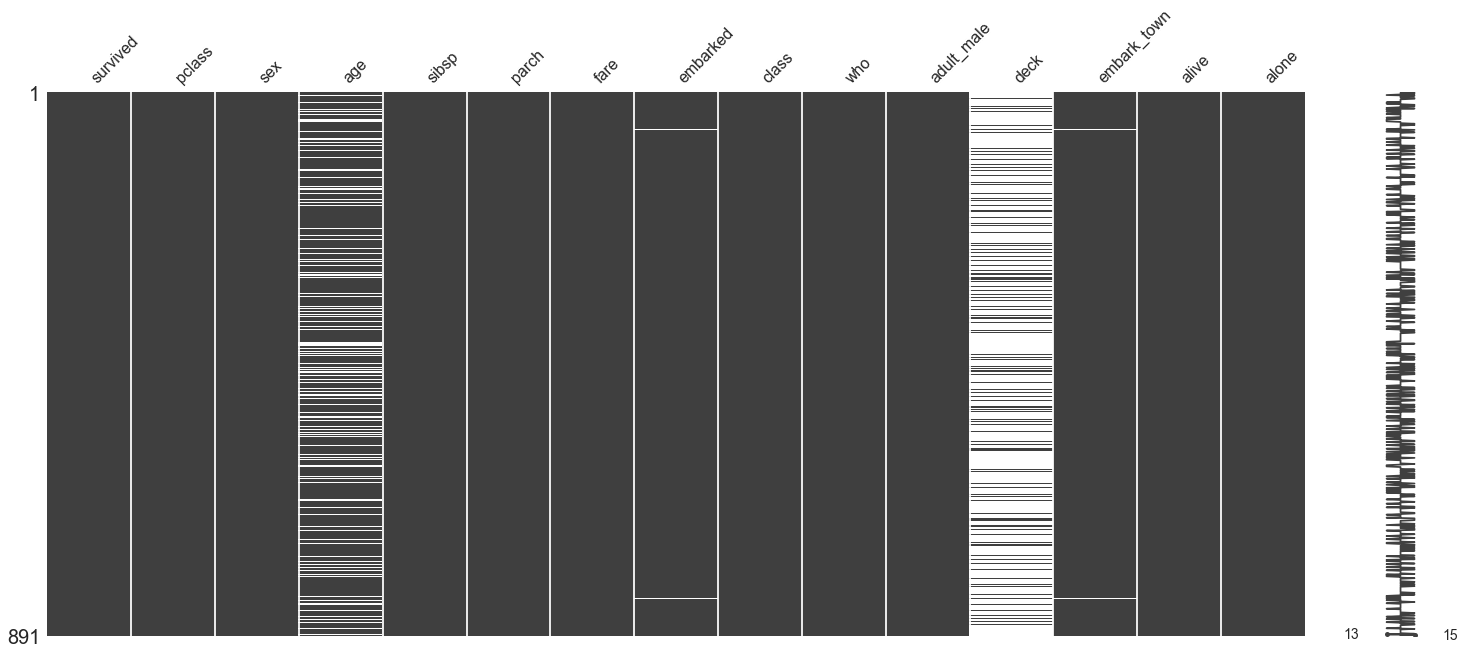

In [11]:
msno.matrix(titanic)

The white lines show us the missing data. One quick observation is that `deck` has a lot of missing data. Let's just go ahead and drop that column from the dataset since it's not relevant.

In [12]:
titanic.drop('deck', axis=1, inplace=True)

Now let's rerun the matrix and see. All that white is gone! Nice.

We still have a bunch of missing values for the age field. We can't just drop the age column since it is a pretty important datapoint. One way to deal with this is simply to just remove the records with `dropna()`, but this would end up removing out a significant amount of our data. 

What do we do now? We can now explore a technique called **missing value imputation**. What this means is basically we find a reasonable way to *replace* the unknown data with workable values. 

There's a lot of theory regarding how to do this properly, ([for the curious look here](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)). We can simply put in the average age value for the missing ages. But this really isn't so great as it would skew our stats towards the mean without taking into account various trends within the data.

If we assume that the data is missing *at random* (which actually is rarely the case), we can fit a model to predict the missing value based on the other factors in the dataset. One popular way to do this is a linear regression (coming forth in lecture #3!) [`regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html) is a seaborn function to easily plot a linear regression.

Considering all these factors, assumptions and trade-offs, you must now make you own decision on how to deal with the missing data. You may choose any of the methods discussed above, or choose to not do anything at all (in which case you would only drop missing values when plotting). After writing your code below, verify the result by rerunning the matrix.

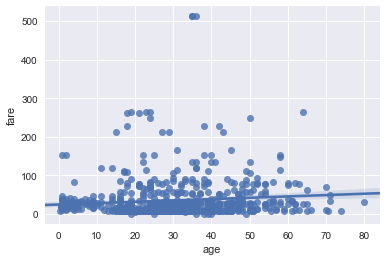

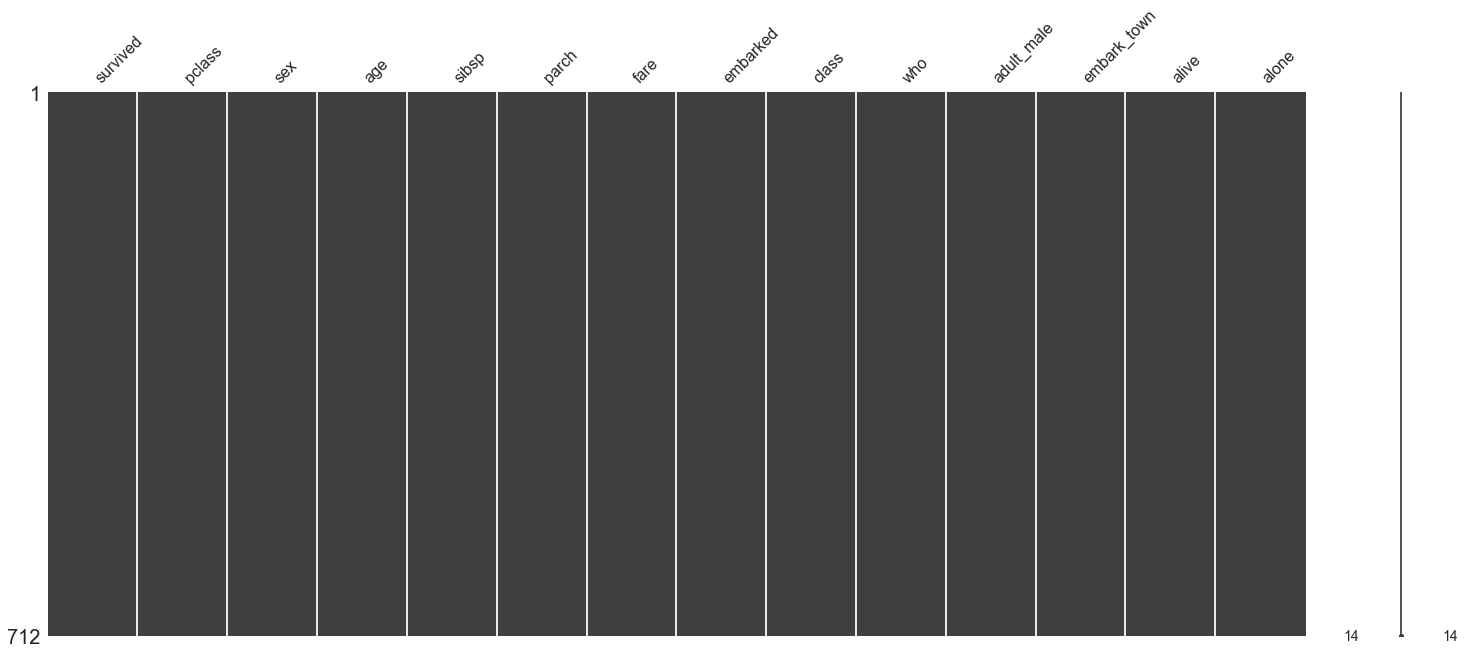

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [13]:
sns.regplot(x='age',y='fare',data=titanic)
clean_titanic=titanic.dropna()
msno.matrix(clean_titanic)
clean_titanic.describe()

## Intro to Seaborn

There are 2 types of data in any dataset: categorial and numerical data. We will first explore categorical data.

One really easy way to show categorical data is through bar plots. Let's explore how to make some in seaborn.
We want to investigate the difference in rates at which males vs females survived the accident. Using the [documentation here](https://seaborn.pydata.org/generated/seaborn.barplot.html) and [example here](http://seaborn.pydata.org/examples/color_palettes.html), create a `barplot` to depict this. It should be a really simple one-liner.

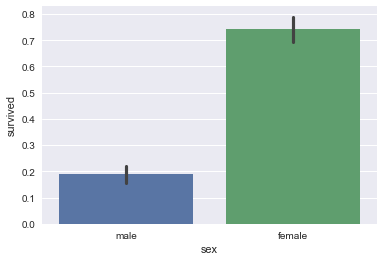

In [14]:
#x=titanic.sex
#y=[titanic.loc[titanic['sex']=='male'].survived.sum(),titanic.loc[titanic['sex']=='female'].survived.sum()]
#sns.barplot(x,y)

sns.barplot('sex','survived',data=titanic)#,hue="sex")

Notice how it was so easy to create the plot! You simply passed in the entire dataset, and just specified the `x` and `y` fields that you wanted exposed for the barplot. Behind the scenes seaborn ignored `NaN` values for you and automatically calculated the survival rate to plot. Also, that black tick is a 95% confidence interval that seaborn plots.

So we see that females were much more likely to make it out alive. What other factors do you think could have an impact on surival rate? Plot a couple more barplots below. Make sure to use *categorical* values like `sex` used above, not something numerical like age or fare.

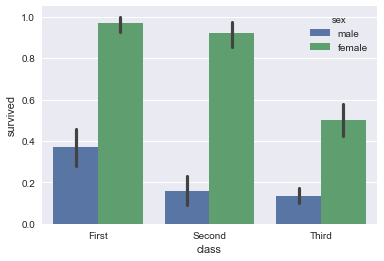

In [15]:
sns.barplot('class','survived',data=titanic,hue="sex")

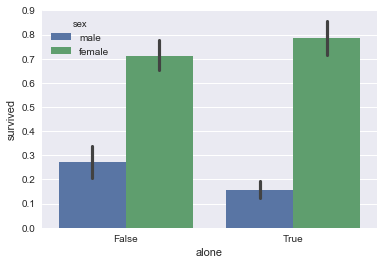

In [16]:
sns.barplot('alone','survived',data=titanic,hue="sex")

What if we wanted to add a further sex breakdown for the categories chosen above? Go back and add a `hue` parameter for `sex` for the couple plots you just created, and seaborn will split each bar into a male/female comparison.

Now we want to compare the embarking town vs the age of the individuals. We don't simply want to use a barplot, since that will just give the average age; rather, we would like more insight into the relative and numeric *distribution* of ages.

A good tool to help us here is [`swarmplot`](https://seaborn.pydata.org/generated/seaborn.swarmplot.html). Use this function to view `embark_town` vs `age`, again using `sex` as the `hue`.

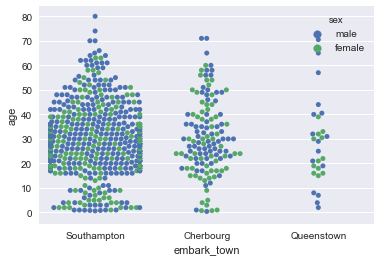

In [17]:
sns.swarmplot('embark_town','age',data=titanic, hue='sex')

Cool! This gives us much more information. What if we didn't care about the number of individuals in each category at all, but rather just wanted to see the *distribution* in each category? [`violinplot`](https://seaborn.pydata.org/generated/seaborn.violinplot.html) plots a density distribution. Plot that.

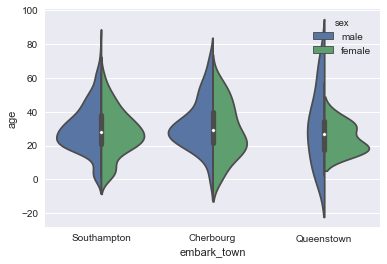

In [18]:
sns.violinplot('embark_town','age',data=titanic, hue='sex',split='True')

Go back and clean up the violinplot by adding `split='True'` parameter. 

Now take a few seconds to look at the graphs you've created of this data. What are some observations? Jot a couple down here.

* Queenstown has a much wider range of ages for males than females.
* Most of the inhabitants in Southampton are the same ages.
* The average age of women in Cherbourg is slightly lower than the men's average.

As I mentioned, data is categorical or numeric. We already started getting into numerical data with the swarmplot and violinplot. We will now explore a couple more examples.

Let's look at the distribution of ages. Use [`displot`](https://seaborn.pydata.org/generated/seaborn.distplot.html) to make a histogram of just the ages.

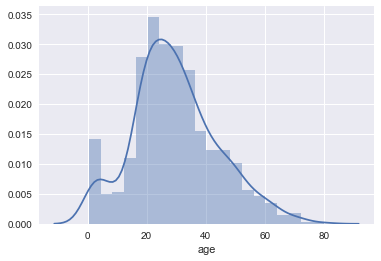

In [19]:
sns.distplot(clean_titanic.age,hist='True')
 

A histogram can nicely represent numerical data by breaking up numerical ranges into chunks so that it is easier to visualize. As you might notice, seaborn also automatically plots a gaussian kernel density estimate.

Do the same thing for fares - do you notice something odd about that histogram? What does that skew mean?

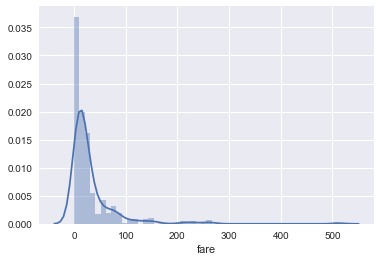

In [20]:
sns.distplot(titanic.fare,hist='True')

Now, using the [`jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot) function, make a scatterplot of the `age` and `fare` variables to see if there is any relationship between the two.

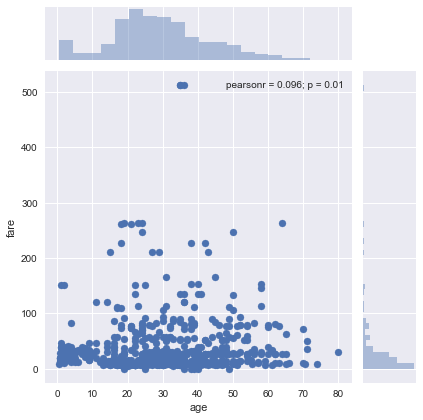

In [21]:
sns.jointplot('age','fare',data=titanic)

Scatterplots allow one to easily see trends/coorelations in data. As you can see here, there seems to be very little correlation. Also observe that seaborn automatically plots histograms.

## Diving into a familiar dataset

Now you hopefully have a pretty good understanding of both seaborn and matplotlib. You will now apply your learned skills to a familiar dataset, the 2016 election contributions. Navigate [here](http://classic.fec.gov/disclosurep/PDownload.do) and download ALL.zip. 

There will be no hand-holding in this section. You know how to import a dataset, pull out and clean the values you need, and then plot it. You will follow this whole pipeline yourself. 

Please plot 2 graphs:
* the first graph should show the *cumulative* contributions for the candidate of your choide
* the second graph should be a histogram of the contributions (not cumulative), with a bin for each month

You may use whatever outside libraries you wish. The [`tsplot`](http://seaborn.pydata.org/generated/seaborn.tsplot.html) and [`distplot`](http://seaborn.pydata.org/generated/seaborn.distplot.html) from seaborn might be useful. The [`hist`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html) from matplotlib and [`cumsum`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html) from numpy may also be useful.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import datetime as dt
import matplotlib.dates as mdates
import folium
donations = pd.read_csv('2016-donations.csv', index_col=False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (6,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
contributions = donations[['cand_nm', 'contb_receipt_dt', 'contb_receipt_amt', 'contbr_nm', 'election_tp']]
contributions.describe()

,contb_receipt_amt
count,7.440252e+06
mean,1.261310e+02
std,7.623128e+03
min,-9.330800e+04
25%,1.500000e+01
50%,2.800000e+01
75%,9.435000e+01
max,1.277771e+07


In [24]:
clean_contributions = contributions.dropna()
rubio_conts = clean_contributions[clean_contributions.cand_nm == 'Rubio, Marco']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


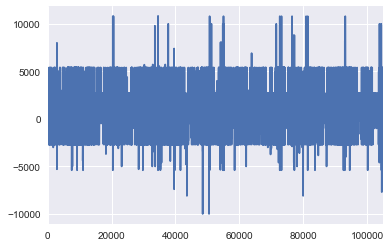

In [25]:
sns.tsplot(rubio_conts.contb_receipt_amt)

In [153]:
"""def helper(cont):
    #month={JAN:0,FEB:0,MAR:0,APR:0,MAY:0,JUN:0,JUL:0,AUG:0,SEP:0,OCT:0,NOV:0,DEC:0}
    month=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
    result={'JAN15':0,'FEB15':0,'MAR15':0,'APR15':0,'MAY15':0,'JUN15':0,'JUL15':0,'AUG15':0,'SEP15':0,'OCT15':0,'NOV15':0,'DEC15':0,'JAN16':0,'FEB16':0,'MAR16':0,'APR16':0,'MAY16':0,'JUN16':0,'JUL16':0,'AUG16':0,'SEP16':0,'OCT16':0,'NOV16':0,'DEC16':0}
    for i in range(len(cont.index)):
        for mo in month:
            if (mo in cont.contb_receipt_dt[i]) and ('15' in cont.contb_receipt_dt[i]):
                result[mo+'15']+=cont.contb_receipt_amt[i]
            elif (mo in cont.contb_receipt_dt[i]) and ('16' in cont.contb_receipt_dt[i]):
                result[mo+'16']+=cont.contb_receipt_amt[i]
    return result
"""
def helper2(cont):
    month=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
    result={'JAN15':0,'FEB15':0,'MAR15':0,'APR15':0,'MAY15':0,'JUN15':0,'JUL15':0,'AUG15':0,'SEP15':0,'OCT15':0,'NOV15':0,'DEC15':0,'JAN16':0,'FEB16':0,'MAR16':0,'APR16':0,'MAY16':0,'JUN16':0,'JUL16':0,'AUG16':0,'SEP16':0,'OCT16':0,'NOV16':0,'DEC16':0}
    
    for index, row in cont.iterrows():
        for mo in month:
            if (mo in row.contb_receipt_dt) and ('15' in row.contb_receipt_dt):
                result[mo+'15']+=row.contb_receipt_amt
            elif (mo in row.contb_receipt_dt) and ('16' in row.contb_receipt_dt):
                result[mo+'16']+=row.contb_receipt_amt
    return result
result=helper2(rubio_conts)

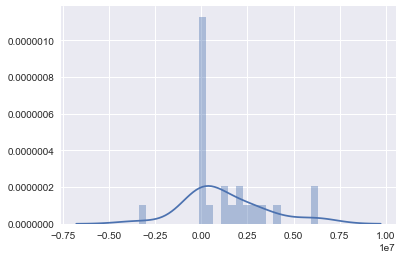

In [157]:
def resultscrape(result):
    tracker=['JAN15','FEB15','MAR15','APR15','MAY15','JUN15','JUL15','AUG15','SEP15','OCT15','NOV15','DEC15','JAN16','FEB16','MAR16','APR16','MAY16','JUN16','JUL16','AUG16','SEP16','OCT16','NOV16','DEC16']
    lst=[]
    for i in tracker:
        lst.append(result[i])
    return lst
sns.distplot(resultscrape(result),  hist='True',bins=24) 


In [154]:
result

{'APR15': 2186797.7300000014,
 'APR16': -139312.45,
 'AUG15': 1332331.31,
 'AUG16': 0,
 'DEC15': 6344432.42,
 'DEC16': -6690.0,
 'FEB15': 48065.01,
 'FEB16': 6143994.010000017,
 'JAN15': 142594.16,
 'JAN16': 4044164.2700000005,
 'JUL15': 379922.93999999994,
 'JUL16': -2794.0,
 'JUN15': 2618121.880000001,
 'JUN16': -36300.0,
 'MAR15': 149086.59000000003,
 'MAR16': 1326908.6699999992,
 'MAY15': 1613129.7899999998,
 'MAY16': -3404369.29,
 'NOV15': 3445458.6700000004,
 'NOV16': 0,
 'OCT15': 2223771.0399999996,
 'OCT16': 0,
 'SEP15': 2902186.2,
 'SEP16': -5400.0}